# Langkah 1 - Buat Dataset Dummy

In [1]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)

# Cek Hasil
print(X)
print(y)

[[ 67 134]
 [150  46]
 [  9 170]
 [ 14 155]
 [ 71  76]
 [ 75 127]
 [ 50 156]
 [ 17 186]
 [171  42]
 [202  28]
 [ 61 144]
 [ 46 166]
 [ 37 254]
 [194  59]
 [134  52]
 [ 72 120]
 [  6  85]
 [241 101]
 [ 65  31]
 [233   4]
 [152 139]
 [ 66 126]
 [ 23  73]
 [111 147]
 [ 77  71]
 [125 137]
 [144 115]
 [ 74  35]
 [153 151]
 [ 73  69]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


# Langkah 2 (Opsional) - Membuat Data Frame

In [2]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,67,134,0
1,150,46,0
2,9,170,0
3,14,155,0
4,71,76,0


# Langkah 3 (Opsional) - Labeling

In [3]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,67,134,Kelas B
1,150,46,Kelas B
2,9,170,Kelas B
3,14,155,Kelas B
4,71,76,Kelas B


# Langkah 4 - Visualisasi Data

C:\Users\USER\AppData\Local\Temp\ipykernel_18464\2947333296.py:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
C:\Users\USER\AppData\Local\Temp\ipykernel_18464\2947333296.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


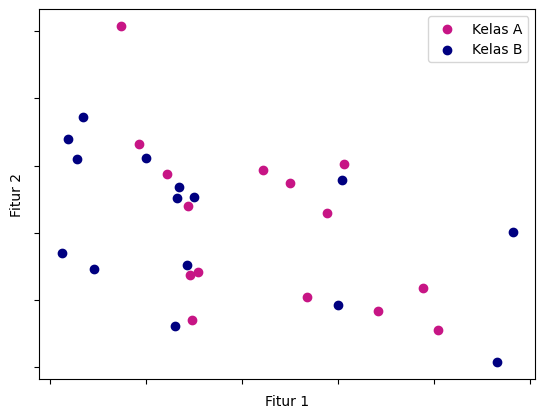

In [4]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

# Langkah 5 - Model Multinomial Naive Bayes

In [5]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6190476190476191
Hasil akurasi data test: 0.6666666666666666


# Langkah 6 - Model Gaussian Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.2222222222222222
